## Simple Brayton cycle

A gas-turbine power plant operating on an ideal Brayton cycle has a pressure ratio of $r_p = p_2 / p_1 = p_3 / p_4$. The gas temperature is $T_1$ at the compressor inlet and $T_3$ at the turbine inlet.

Using the air-standard assumptions, determine:
- (a) the gas temperature at the exits of the compressor and the turbine,
- (b) the back work ratio,
- (c) the thermal efficiency

States:
- (1) Entering compressor
- (2) Entering combustion chamber
- (3) Entering turbine
- (4) Entering heat exchanger

Given:
- $p_1$ = 140 kPa, $p_2$ = 1700 kPa, $T_1$ = 40 $^\circ$C, $\dot{V} =$ 800 m$^3$/min, $T_3$ = 1300 $^\circ$C
- $\eta_\text{compressor}$ = 0.84, $\eta_\text{turbine}$ = 0.85

In [1]:
P1_kPa = 140
P2_kPa = 1700

# inlet temp to compressor
T1_C = 40

# inlet temp to turbine
T3_C = 1300

# volumetric flow rate
vdot_m3perMin = 800

# eta compressor
eta_compressor = .84
eta_turbine = .85

fluid = 'air'
R_JperKgperK = 287.052874

In [2]:
# initializing values
T1 = T1_C + 273.15 # K
T3 = T3_C + 273.15 

# pressure ratio
r_p = P2_kPa/P1_kPa

# flow rate
vdot_m3perS = vdot_m3perMin/60

# inlet pressure to compressor
P1 = P1_kPa*1000 # Pa

# Assumptions
- steady conditions
- air standard
- neglect changes in KE and PE
- will consider variation of specific heats with respect to temperature

In [3]:
!pip install CoolProp

  Using cached CoolProp-6.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (555 bytes)
Using cached CoolProp-6.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.3 MB)


In [4]:
from CoolProp.CoolProp import PropsSI

Calculate the properties of air at state 1

In [44]:
h1 = PropsSI('H','P',P1,'T',T1,fluid)
s1 = PropsSI('S','P',P1,'T',T1,fluid)
D1 = PropsSI('D','P',P1,'T',T1,fluid)

v1 = R_JperKgperK*T1/P1

print(v1)
mdotKgperS = vdot_m3perS/v1
print(mdotKgperS)

0.642075767807857
20.765981215667637


The process of going from state 1 to 2 is a compression process, which is assumed to be isentropic: $s_1 = s_2$. Therefore, we can calculate the properties of state 2 since we know $s_2$ and the pressure, which is $p_2 = p_1 r_p$. We will use the subscript "$s$" to denote the properties computed from this isentropic process. We will use the subscript "$a$" to denote actual values when the process is not isentropic. 

In [35]:
P2 = P1*r_p 
s2 = s1

h2s = PropsSI('H','P',P2,'S',s2,fluid)
T2s = PropsSI('T','P',P2,'S',s2,fluid)

D2s = PropsSI('D','P',P2,'S',s2,fluid)
v2s = 1/D2s

The pressure of state 3 is the same as state 2, $p_3 = p_2$. We also know the temperature of the air so we can define all the remaining properties:

In [36]:
P3 = P2
h3 = PropsSI('H','P',P3,'T',T3,fluid)
s3 = PropsSI('S','P',P3,'T',T3,fluid)
D3 = PropsSI('D','P',P3,'T',T3,fluid)

v3 = 1/D3

The process of going from state 3 to 4 is an isentropic expansion of air. We also know that $p_4 = p_1$. Therefore:

In [37]:
P4 = P1
s4 = s3
h4s = PropsSI('H','P',P4,'S',s4,fluid)
T4s = PropsSI('T','P',P4,'S',s4,fluid)
D4s = PropsSI('D','P',P4,'S',s4,fluid)
v4s = 1/D4s

The above values are for the case where the compressor and turbine operate isentropically. We can now use the $\eta$ efficiency values to calculate the actual property values at the exit of the compressor and turbine. 

$$\eta_\text{compressor} = \frac{\text{Isentropic compressor work}}{\text{Actual compressor work}} = \frac{h_{2s} - h_1}{h_{2a} - h_1} $$

and

$$\eta_\text{turbine} = \frac{\text{Actual turbine work}}{\text{Isentropic turbine work}} = \frac{h_{3} - h_{4a}}{h_{3} - h_{4s}} $$

In [9]:
h4a = -(eta_turbine*(h3-h4s)-h3)
h2a = ((h2s-h1)/eta_compressor)+h1

T2a = PropsSI('T','P',P2,'H',h2a,fluid)
T4a = PropsSI('T','P',P4,'H',h4a,fluid)

Now we have defined all of the states. Therefore, we can define the temperatures at the exits of the compressor and turbine:

In [14]:
print('The gas temperature at the compressor exit when it operates isentropically is {0:1.2f} K.'.format(T2s))
print('(a) The real gas temperature at the compressor exit is {0:1.2f} K.'.format(T2a))

The gas temperature at the compressor exit when it operates isentropically is 631.25 K.
(a) The real gas temperature at the compressor exit is 689.48 K.


In [15]:
print('The gas temperature at the turbine exit when it operates isentropically is {0:1.2f} K.'.format(T4s))
print('(a) The real gas temperature at the turbine exit is {0:1.2f} K.'.format(T4a))

The gas temperature at the turbine exit when it operates isentropically is 851.03 K.
(a) The real gas temperature at the turbine exit is 964.34 K.


### Part (b)

The net power output can be determined by knowing the work transferred into the compressor and out from the turbine:

$$w_\text{net} = w_\text{turbine} - w_\text{compressor} $$

The backwork ratio is defined as the work transferred in from the compressor and the work transferred out by the turbine:

$$r_\text{bw} = \frac{w_\text{comp,in}}{w_\text{turb,out}} $$

In [20]:
wComp_s = h2s - h1
wTurb_s = h3 - h4s

wNet_s = wTurb_s - wComp_s
WdotNet_s = wNet_s*mdotKgperS/1e3

print('The net energy output for an isentropic compressor and turbine is {0:1.2f} J/kg.'.format(wNet_s))
print('The net power output for an isentropic compressor and turbine is {0:1.2f} kW.'.format(WdotNet_s))

wCompA = h2a - h1
wTurbA = h3 - h4a

wNetA = wTurbA - wCompA
wdotNetA = wNetA*mdotKgperS/1e3

print()
print('The net energy output for a real compressor and turbine is {0:1.2f} J/kg.'.format(wNetA))
print('The net power output for a real compressor and turbine is {0:1.2f} kW.'.format(wdotNetA))

The net energy output for an isentropic compressor and turbine is 520947.44 J/kg.
The net power output for an isentropic compressor and turbine is 10817.98 kW.

The net energy output for a real compressor and turbine is 331505.91 J/kg.
The net power output for a real compressor and turbine is 6884.05 kW.


In [22]:
r_bw_s = wComp_s/wTurb_s
r_bwA = wCompA/wTurbA

print('The backwork ratio for an isentropic compressor and turbine is {0:1.2f}.'.format(r_bw_s))
print('The backwork ratio for a real compressor and turbine is {0:1.2f}.'.format(r_bwA))

The backwork ratio for an isentropic compressor and turbine is 0.39.
The backwork ratio for a real compressor and turbine is 0.54.


### Part (c)

The thermal efficiency of the cycle is the ratio of the net power output to the total heat input:

$$\eta_\text{th} = \frac{w_\text{net}}{q_\text{in}}$$

In [24]:
qIn_s = h3 - h2s
qInA = h3 - h2a

eta_th_s = (wTurb_s - wComp_s)/(qIn_s)
eta_th_A = (wTurbA - wCompA)/(qInA)

print('The thermal efficiency for an isentropic compressor and turbine is {0:1.2%}.'.format(eta_th_s))
print('The thermal efficiency for a real compressor and turbine is {0:1.2%}.'.format(eta_th_A))

The thermal efficiency for an isentropic compressor and turbine is 47.96%.
The thermal efficiency for a real compressor and turbine is 32.37%.


Under the cold-air-standard assumptions, the thermal efficiency would be:

$$\eta_\text{th,Brayton} = 1 - \frac{1}{r_p^{(k-1)/k}} $$

In [25]:
k = 1.4
exponent = (k-1)/k
eta_th_Brayton = 1 - 1/(r_p**exponent)

print('The thermal efficiency is {0:1.2%}.'.format(eta_th_Brayton))

The thermal efficiency is 51.00%.


In [26]:
import numpy as np
import matplotlib.pyplot as plt

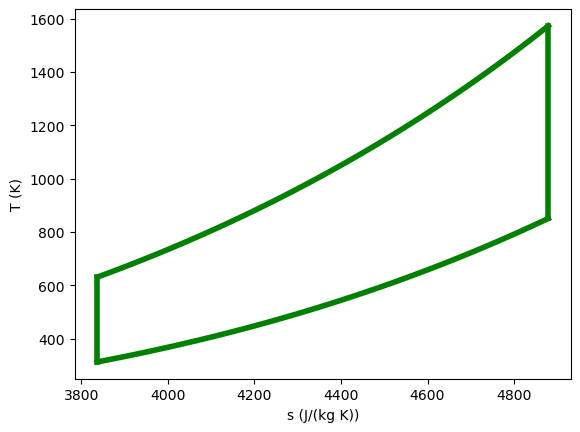

In [34]:
plt.figure()
plt.clf()

# plot for the ideal cycle
plt.plot([s1, s2], [T1, T2s], 'g-', lw=4) # Path 1 to 2

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')

S23 = np.linspace(s2, s3)
T23 = [PropsSI('T','P',P2,'S',s,fluid) for s in S23]
plt.plot(S23,T23, 'g-', lw=4)

plt.plot([s3, s4], [T3, T4s], 'g-', lw=4) # path from 3 to 4 

S41 = np.linspace(s1, s4)
T41 = [PropsSI('T','P',P4,'S',s,fluid) for s in S41]
plt.plot(S41,T41, 'g-', lw=4)

plt.savefig('ideal-brayton-cycle-T-s.png')

#Tsat2 = np.linspace(200, 400, 1000) # range of temperatures
#plt.plot(svap, Tsat2, 'r-')
#plt.plot(sliq, Tsat2, 'r-')

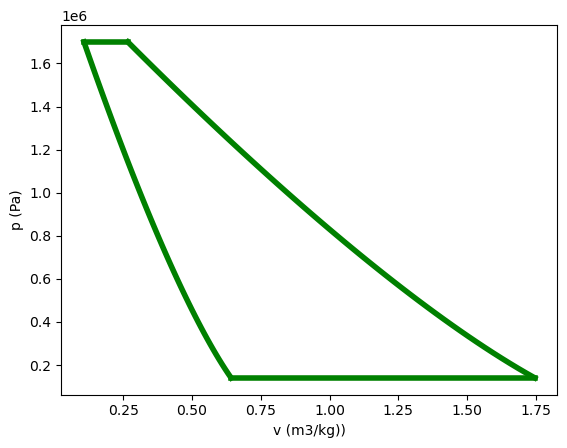

In [46]:
plt.figure()
plt.clf()

# plot for the ideal cycle
plt.plot([v2s, v3], [P2, P3], 'g-', lw=4) # Path 1 to 2

plt.xlabel('v (m3/kg))')
plt.ylabel('p (Pa)')

v34 = np.linspace(v4s,v3)
D34 = np.linspace(D4s, D3)
p34 = [PropsSI('P','D',d,'S',s3,fluid) for d in D34]
plt.plot(v34,p34, 'g-', lw=4)

plt.plot([v4s, v1], [P4, P1], 'g-', lw=4) # Path 1 to 2

v12 = np.linspace(v2s,v1)
D12 = np.linspace(D2s, D1)
p12 = [PropsSI('P','D',d,'S',s2,fluid) for d in D12]
plt.plot(v12,p12, 'g-', lw=4)

plt.savefig('ideal-brayton-cycle-p-v.png')

The maximum theoretical efficiency can also be determined analytically:

$$\dot{W}_\text{net} = \dot{m} c_p \left(T_3 - T_4 \right) - \dot{m} c_p \left(T_2 - T_1 \right) $$

Recall that (TdS relations, assuming isentropic):

$$T_1 = T_2 \left(\frac{p_1}{p_2} \right)^{(k-1)/k} $$

We can then write: 

$$\left(T_2 - T_1 \right) = \left(T_2 - T_2 \left(\frac{p_1}{p_2} \right)^{(k-1)/k} \right)$$

$$\left(T_2 - T_1 \right) = T_2 \left(1 - \left(\frac{1}{r_p} \right)^{(k-1)/k} \right)$$

$$\left(T_2 - T_1 \right) = T_2 \left(1 - r_p^{(1-k)/k} \right)$$

This implies:

$$\dot{W}_\text{net} = \dot{m} c_p T_3 \left(1 - r_p^{(1-k)/k} \right) - \dot{m} c_p T_2 \left(1 - r_p^{(1-k)/k} \right) $$

The heat transferred in is:

$$\dot{Q}_\text{in} = \dot{m} c_p \left(T_3 - T_2 \right) $$

The efficiency is then:

$$\eta = \frac{\dot{W}_\text{net}}{\dot{Q}_\text{in}}= \frac{\dot{m} c_p T_3 \left(1 - r_p^{(1-k)/k} \right) - \dot{m} c_p T_2 \left(1 - r_p^{(1-k)/k} \right)}{ \dot{m} c_p \left(T_3 - T_2 \right)}$$

Which simplifies to:

$$\eta = 1 - r_p^{(1-k)/k}$$



Text(0, 0.5, '$\\eta$ (-)')

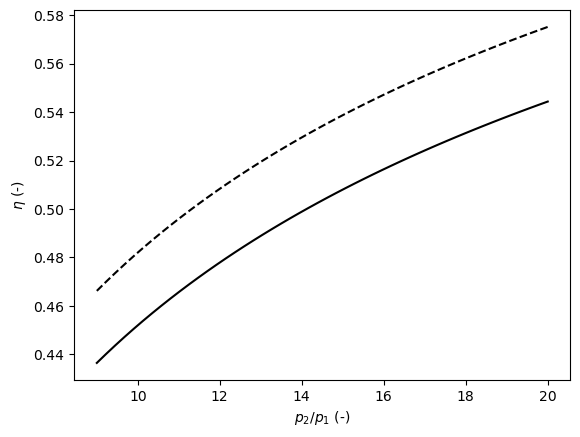

In [66]:
def brayton(rp_):
    h1 = PropsSI('H','P',P1,'T',T1,fluid)
    s1 = PropsSI('S','P',P1,'T',T1,fluid)
    D1 = PropsSI('D','P',P1,'T',T1,fluid)
    v1 = 1/D1
    
    P2_ = P1*rp_    
    s2 = s1
    h2s = PropsSI('H','P',P2_,'S',s2,fluid)
    T2s = PropsSI('T','P',P2_,'S',s2,fluid)

    P3 = P2_
    h3 = PropsSI('H','P',P3,'T',T3,fluid)
    s3 = PropsSI('S','P',P3,'T',T3,fluid)

    P4 = P1
    s4 = s3
    h4s = PropsSI('H','P',P4,'S',s4,fluid)
    T4s = PropsSI('T','P',P4,'S',s4,fluid)

    qIn_s = h3 - h2s
    wNet_s = (h3 - h4s) - (h2s - h1)
    eta_th_s = wNet_s/(qIn_s)
    
    return eta_th_s

rp_ = np.linspace(9,20)
eta = brayton(rp_)

plt.plot(rp_, eta, 'k-')

k = 1.4
eta_ = 1 - rp_**((1-k)/k)

plt.plot(rp_, eta_, 'k--')

plt.xlabel('$p_2/p_1$ (-)')
plt.ylabel('$\eta$ (-)')

# Example usage
#result = brayton(9)
#print(result)  # Output: 8

The dashed line is calculated from the above formula and the solid line is computed by using actual properties. The trend agrees. 

We can also ask the question about what pressure ratio will give us the maximum value of $\eta$. For that we write:

$$\left(\frac{\partial \eta}{\partial r_p} \right) = 0 $$

$$\left(\frac{\partial \eta}{\partial r_p} \right) = -\left(\frac{1 - k}{k}\right) r_p^{[((1-k)/k) - 1]}$$

Text(0, 0.5, '$d \\eta / d r_p$ (-)')

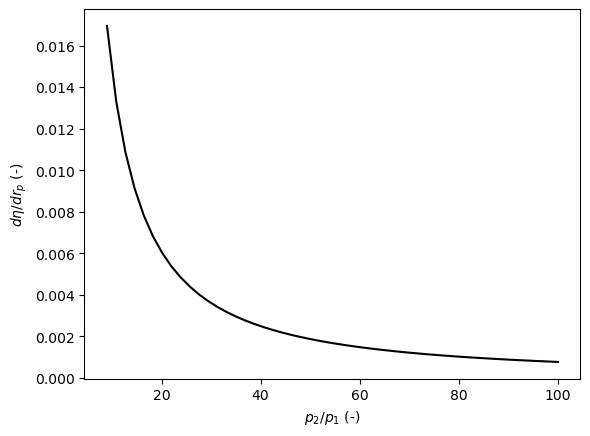

In [72]:
DetaDr = -((1-k)/k)*(rp_**(((1-k)/k)-1))

rp_ = np.linspace(9,100)
plt.plot(rp_, DetaDr, 'k-')

plt.xlabel('$p_2/p_1$ (-)')
plt.ylabel('$d \eta / d r_p$ (-)')

The maximum efficiency is when $p_2/p_1$ is largest. 